In [1]:
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette("Set1")
sns.set_context('talk')

log_dir = "logs/"
fig_dir = "figures/"

# Plots Plain DQN

In [2]:
# Load in DQN logs
dqn_capacity_100 = pd.read_csv(log_dir + "dqn_capacity_100.csv")
dqn_capacity_1000 = pd.read_csv(log_dir + "dqn_capacity_1000.csv")
dqn_capacity_5000 = pd.read_csv(log_dir + "dqn_capacity_5000.csv")

dqn_batchsize_32 = pd.read_csv(log_dir + "dqn_batchsize_32.csv")
dqn_batchsize_64 = pd.read_csv(log_dir + "dqn_batchsize_64.csv")
dqn_batchsize_128 = pd.read_csv(log_dir + "dqn_batchsize_128.csv")

dqn_lrate_1e3 = pd.read_csv(log_dir + "dqn_lrate_1e3.csv")
dqn_lrate_1e4 = pd.read_csv(log_dir + "dqn_lrate_1e4.csv")
dqn_lrate_1e5 = pd.read_csv(log_dir + "dqn_lrate_1e5.csv")

dqn_hard_update_1 = pd.read_csv(log_dir + "dqn_hard_update_1.csv")
dqn_hard_update_100 = pd.read_csv(log_dir + "dqn_hard_update_100.csv")
dqn_soft_update_001 = pd.read_csv(log_dir + "dqn_soft_update_001.csv")
dqn_soft_update_005 = pd.read_csv(log_dir + "dqn_soft_update_005.csv")

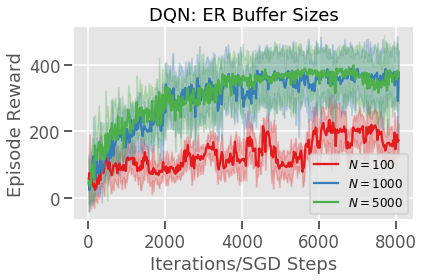

In [27]:
# Capacity Plot
rew_1 = plt.plot(dqn_capacity_100.loc[:400, "opt_counter"], dqn_capacity_100.loc[:400, "rew_mean"], label=r"$N=100$")
plt.fill_between(dqn_capacity_100.loc[:400, "opt_counter"],
                 dqn_capacity_100.loc[:400, "rew_mean"] - 2*dqn_capacity_100.loc[:400, "rew_sd"],
                 dqn_capacity_100.loc[:400, "rew_mean"] + 2*dqn_capacity_100.loc[:400, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(dqn_capacity_1000.loc[:400, "opt_counter"], dqn_capacity_1000.loc[:400, "rew_mean"], label=r"$N=1000$")
plt.fill_between(dqn_capacity_1000.loc[:400, "opt_counter"],
                 dqn_capacity_1000.loc[:400, "rew_mean"] - 2*dqn_capacity_1000.loc[:400, "rew_sd"],
                 dqn_capacity_1000.loc[:400, "rew_mean"] + 2*dqn_capacity_1000.loc[:400, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)


rew_3 = plt.plot(dqn_capacity_5000.loc[:400, "opt_counter"], dqn_capacity_5000.loc[:400, "rew_mean"], label=r"$N=5000$")
plt.fill_between(dqn_capacity_5000.loc[:400, "opt_counter"],
                 dqn_capacity_5000.loc[:400, "rew_mean"] - 2*dqn_capacity_5000.loc[:400, "rew_sd"],
                 dqn_capacity_5000.loc[:400, "rew_mean"] + 2*dqn_capacity_5000.loc[:400, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xlabel("Iterations/SGD Steps")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("DQN: ER Buffer Size")
plt.tight_layout()
plt.savefig(fig_dir + "dqn_buffer.png", dpi=300)

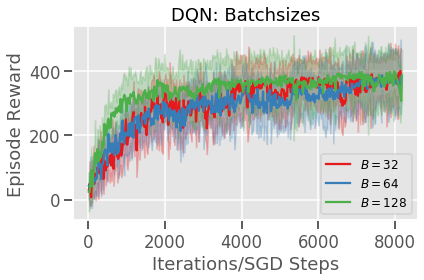

In [20]:
# Batchsize Plot
rew_1 = plt.plot(dqn_batchsize_32.loc[:, "opt_counter"], dqn_batchsize_32.loc[:, "rew_mean"], label=r"$B=32$")
plt.fill_between(dqn_batchsize_32.loc[:, "opt_counter"],
                 dqn_batchsize_32.loc[:, "rew_mean"] - 2*dqn_batchsize_32.loc[:, "rew_sd"],
                 dqn_batchsize_32.loc[:, "rew_mean"] + 2*dqn_batchsize_32.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(dqn_batchsize_64.loc[:, "opt_counter"], dqn_batchsize_64.loc[:, "rew_mean"], label=r"$B=64$")
plt.fill_between(dqn_batchsize_64.loc[:, "opt_counter"],
                 dqn_batchsize_64.loc[:, "rew_mean"] - 2*dqn_batchsize_64.loc[:, "rew_sd"],
                 dqn_batchsize_64.loc[:, "rew_mean"] + 2*dqn_batchsize_64.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(dqn_batchsize_128.loc[:, "opt_counter"], dqn_batchsize_128.loc[:, "rew_mean"], label=r"$B=128$")
plt.fill_between(dqn_batchsize_128.loc[:, "opt_counter"],
                 dqn_batchsize_128.loc[:, "rew_mean"] - 2*dqn_batchsize_128.loc[:, "rew_sd"],
                 dqn_batchsize_128.loc[:, "rew_mean"] + 2*dqn_batchsize_128.loc[:, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xlabel("Iterations/SGD Steps")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("DQN: Batchsize")
plt.tight_layout()
plt.savefig(fig_dir + "dqn_batchsize.png", dpi=300)

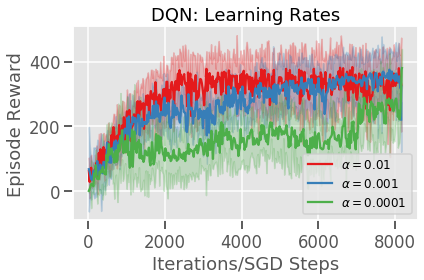

In [23]:
# Learning rate Plot
rew_1 = plt.plot(dqn_lrate_1e3.loc[:, "opt_counter"], dqn_lrate_1e3.loc[:, "rew_mean"], label=r"$\eta = 0.01$")
plt.fill_between(dqn_lrate_1e3.loc[:, "opt_counter"],
                 dqn_lrate_1e3.loc[:, "rew_mean"] - 2*dqn_lrate_1e3.loc[:, "rew_sd"],
                 dqn_lrate_1e3.loc[:, "rew_mean"] + 2*dqn_lrate_1e3.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(dqn_lrate_1e4.loc[:, "opt_counter"], dqn_lrate_1e4.loc[:, "rew_mean"], label=r"$\eta = 0.001$")
plt.fill_between(dqn_lrate_1e4.loc[:, "opt_counter"],
                 dqn_lrate_1e4.loc[:, "rew_mean"] - 2*dqn_lrate_1e4.loc[:, "rew_sd"],
                 dqn_lrate_1e4.loc[:, "rew_mean"] + 2*dqn_lrate_1e4.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(dqn_lrate_1e5.loc[:, "opt_counter"], dqn_lrate_1e5.loc[:, "rew_mean"], label=r"$\eta = 0.0001$")
plt.fill_between(dqn_lrate_1e5.loc[:, "opt_counter"],
                 dqn_lrate_1e5.loc[:, "rew_mean"] - 2*dqn_lrate_1e5.loc[:, "rew_sd"],
                 dqn_lrate_1e5.loc[:, "rew_mean"] + 2*dqn_lrate_1e5.loc[:, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xlabel("Iterations/SGD Steps")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("DQN: Learning Rate")
plt.tight_layout()
plt.savefig(fig_dir + "dqn_lrate.png", dpi=300)

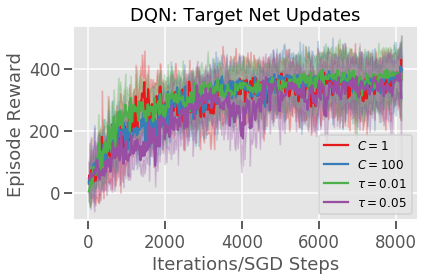

In [25]:
# Soft vs Hard updates
rew_1 = plt.plot(dqn_hard_update_1.loc[:, "opt_counter"], dqn_hard_update_1.loc[:, "rew_mean"], label=r"$C = 1$")
plt.fill_between(dqn_hard_update_1.loc[:, "opt_counter"],
                 dqn_hard_update_1.loc[:, "rew_mean"] - 2*dqn_hard_update_1.loc[:, "rew_sd"],
                 dqn_hard_update_1.loc[:, "rew_mean"] + 2*dqn_hard_update_1.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(dqn_hard_update_100.loc[:, "opt_counter"], dqn_hard_update_100.loc[:, "rew_mean"], label=r"$C = 100$")
plt.fill_between(dqn_hard_update_100.loc[:, "opt_counter"],
                 dqn_hard_update_100.loc[:, "rew_mean"] - 2*dqn_hard_update_100.loc[:, "rew_sd"],
                 dqn_hard_update_100.loc[:, "rew_mean"] + 2*dqn_hard_update_100.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(dqn_soft_update_001.loc[:, "opt_counter"], dqn_soft_update_001.loc[:, "rew_mean"], label=r"$\tau = 0.01$")
plt.fill_between(dqn_soft_update_001.loc[:, "opt_counter"],
                 dqn_soft_update_001.loc[:, "rew_mean"] - 2*dqn_soft_update_001.loc[:, "rew_sd"],
                 dqn_soft_update_001.loc[:, "rew_mean"] + 2*dqn_soft_update_001.loc[:, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

rew_4 = plt.plot(dqn_soft_update_005.loc[:, "opt_counter"], dqn_soft_update_005.loc[:, "rew_mean"], label=r"$\tau = 0.05$")
plt.fill_between(dqn_soft_update_005.loc[:, "opt_counter"],
                 dqn_soft_update_005.loc[:, "rew_mean"] - 2*dqn_soft_update_005.loc[:, "rew_sd"],
                 dqn_soft_update_005.loc[:, "rew_mean"] + 2*dqn_soft_update_005.loc[:, "rew_sd"],
                 color=rew_4[0].get_color(), alpha=0.25)

plt.xlabel("Iterations/SGD Steps")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("DQN: Target Net Update")
plt.tight_layout()
plt.savefig(fig_dir + "dqn_target_update.png", dpi=300)

# Plots Double DQN

In [28]:
# Load in Double DQN Logs
ddqn_soft_update_001 = pd.read_csv(log_dir + "ddqn_soft_update_001.csv")
ddqn_soft_update_005 = pd.read_csv(log_dir + "ddqn_soft_update_005.csv")
ddqn_soft_update_01 = pd.read_csv(log_dir + "ddqn_soft_update_01.csv")

ddqn_gamma_09 = pd.read_csv(log_dir + "ddqn_gamma_09.csv")
ddqn_gamma_095 = pd.read_csv(log_dir + "ddqn_gamma_095.csv")
ddqn_gamma_099 = pd.read_csv(log_dir + "ddqn_gamma_099.csv")

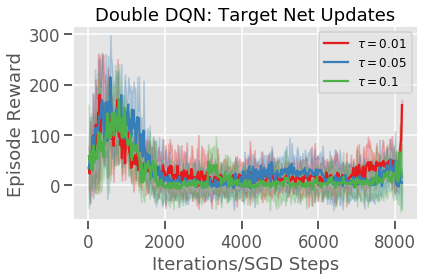

In [30]:
# Double Target Update Plot
rew_1 = plt.plot(ddqn_soft_update_001.loc[:, "opt_counter"], ddqn_soft_update_001.loc[:, "rew_mean"], label=r"$\tau = 0.01$")
plt.fill_between(ddqn_soft_update_001.loc[:, "opt_counter"],
                 ddqn_soft_update_001.loc[:, "rew_mean"] - 2*ddqn_soft_update_001.loc[:, "rew_sd"],
                 ddqn_soft_update_001.loc[:, "rew_mean"] + 2*ddqn_soft_update_001.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(ddqn_soft_update_005.loc[:, "opt_counter"], ddqn_soft_update_005.loc[:, "rew_mean"], label=r"$\tau = 0.05$")
plt.fill_between(ddqn_soft_update_005.loc[:, "opt_counter"],
                 ddqn_soft_update_005.loc[:, "rew_mean"] - 2*ddqn_soft_update_005.loc[:, "rew_sd"],
                 ddqn_soft_update_005.loc[:, "rew_mean"] + 2*ddqn_soft_update_005.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(ddqn_soft_update_01.loc[:, "opt_counter"], ddqn_soft_update_01.loc[:, "rew_mean"], label=r"$\tau = 0.1$")
plt.fill_between(ddqn_soft_update_01.loc[:, "opt_counter"],
                 ddqn_soft_update_01.loc[:, "rew_mean"] - 2*ddqn_soft_update_01.loc[:, "rew_sd"],
                 ddqn_soft_update_01.loc[:, "rew_mean"] + 2*ddqn_soft_update_01.loc[:, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xlabel("Iterations/SGD Steps")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("Double DQN: Target Net Update")
plt.tight_layout()
plt.savefig(fig_dir + "ddqn_target_update.png", dpi=300)

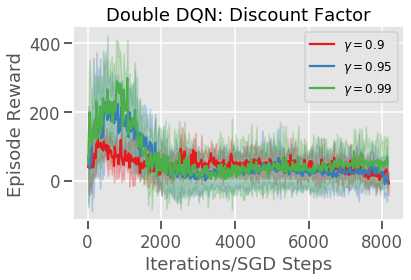

In [31]:
# Double Gamma Discount Plot
rew_1 = plt.plot(ddqn_gamma_09.loc[:, "opt_counter"], ddqn_gamma_09.loc[:, "rew_mean"], label=r"$\gamma = 0.9$")
plt.fill_between(ddqn_gamma_09.loc[:, "opt_counter"],
                 ddqn_gamma_09.loc[:, "rew_mean"] - 2*ddqn_gamma_09.loc[:, "rew_sd"],
                 ddqn_gamma_09.loc[:, "rew_mean"] + 2*ddqn_gamma_09.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(ddqn_gamma_095.loc[:, "opt_counter"], ddqn_gamma_095.loc[:, "rew_mean"], label=r"$\gamma = 0.95$")
plt.fill_between(ddqn_gamma_095.loc[:, "opt_counter"],
                 ddqn_gamma_095.loc[:, "rew_mean"] - 2*ddqn_gamma_095.loc[:, "rew_sd"],
                 ddqn_gamma_095.loc[:, "rew_mean"] + 2*ddqn_gamma_095.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(ddqn_gamma_099.loc[:, "opt_counter"], ddqn_gamma_099.loc[:, "rew_mean"], label=r"$\gamma = 0.99$")
plt.fill_between(ddqn_gamma_099.loc[:, "opt_counter"],
                 ddqn_gamma_099.loc[:, "rew_mean"] - 2*ddqn_gamma_099.loc[:, "rew_sd"],
                 ddqn_gamma_099.loc[:, "rew_mean"] + 2*ddqn_gamma_099.loc[:, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xlabel("Iterations/SGD Steps")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("Double DQN: Discount Factor")
plt.tight_layout()
plt.savefig(fig_dir + "ddqn_gamma.png", dpi=300)

# Plots Prioritized ER DQN

In [32]:
# Load in PER DQN Logs
per_dqn_alpha_02 = pd.read_csv(log_dir + "per_dqn_alpha_02.csv")
per_dqn_alpha_05 = pd.read_csv(log_dir + "per_dqn_alpha_05.csv")
per_dqn_alpha_08 = pd.read_csv(log_dir + "per_dqn_alpha_08.csv")

per_dqn_beta_02 = pd.read_csv(log_dir + "per_dqn_beta_02.csv")
per_dqn_beta_05 = pd.read_csv(log_dir + "per_dqn_beta_05.csv")
per_dqn_beta_08 = pd.read_csv(log_dir + "per_dqn_beta_08.csv")

per_dqn_capacity_100 = pd.read_csv(log_dir + "per_dqn_capacity_100.csv")
per_dqn_capacity_1000 = pd.read_csv(log_dir + "per_dqn_capacity_1000.csv")
per_dqn_capacity_5000 = pd.read_csv(log_dir + "per_dqn_capacity_5000.csv")

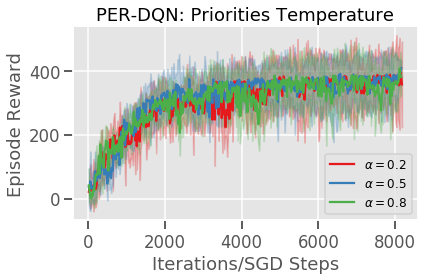

In [33]:
# Alpha Boltzmann Plot
rew_1 = plt.plot(per_dqn_alpha_02.loc[:, "opt_counter"], per_dqn_alpha_02.loc[:, "rew_mean"], label=r"$\alpha = 0.2$")
plt.fill_between(per_dqn_alpha_02.loc[:, "opt_counter"],
                 per_dqn_alpha_02.loc[:, "rew_mean"] - 2*per_dqn_alpha_02.loc[:, "rew_sd"],
                 per_dqn_alpha_02.loc[:, "rew_mean"] + 2*per_dqn_alpha_02.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(per_dqn_alpha_05.loc[:, "opt_counter"], per_dqn_alpha_05.loc[:, "rew_mean"], label=r"$\alpha = 0.5$")
plt.fill_between(per_dqn_alpha_05.loc[:, "opt_counter"],
                 per_dqn_alpha_05.loc[:, "rew_mean"] - 2*per_dqn_alpha_05.loc[:, "rew_sd"],
                 per_dqn_alpha_05.loc[:, "rew_mean"] + 2*per_dqn_alpha_05.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(per_dqn_alpha_08.loc[:, "opt_counter"], per_dqn_alpha_08.loc[:, "rew_mean"], label=r"$\alpha = 0.8$")
plt.fill_between(per_dqn_alpha_08.loc[:, "opt_counter"],
                 per_dqn_alpha_08.loc[:, "rew_mean"] - 2*per_dqn_alpha_08.loc[:, "rew_sd"],
                 per_dqn_alpha_08.loc[:, "rew_mean"] + 2*per_dqn_alpha_08.loc[:, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xlabel("Iterations/SGD Steps")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("PER-DQN: Prioritization Temperature")
plt.tight_layout()
plt.savefig(fig_dir + "per_dqn_temp.png", dpi=300)

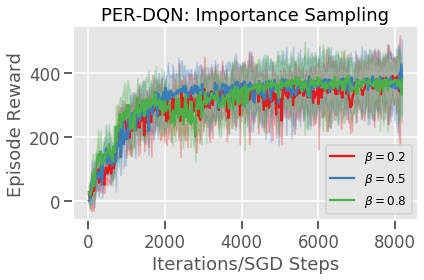

In [35]:
# Importance Sampling Plot
rew_1 = plt.plot(per_dqn_beta_02.loc[:, "opt_counter"], per_dqn_beta_02.loc[:, "rew_mean"], label=r"$\beta = 0.2$")
plt.fill_between(per_dqn_beta_02.loc[:, "opt_counter"],
                 per_dqn_beta_02.loc[:, "rew_mean"] - 2*per_dqn_beta_02.loc[:, "rew_sd"],
                 per_dqn_beta_02.loc[:, "rew_mean"] + 2*per_dqn_beta_02.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(per_dqn_beta_05.loc[:, "opt_counter"], per_dqn_beta_05.loc[:, "rew_mean"], label=r"$\beta = 0.5$")
plt.fill_between(per_dqn_beta_05.loc[:, "opt_counter"],
                 per_dqn_beta_05.loc[:, "rew_mean"] - 2*per_dqn_beta_05.loc[:, "rew_sd"],
                 per_dqn_beta_05.loc[:, "rew_mean"] + 2*per_dqn_beta_05.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(per_dqn_beta_08.loc[:, "opt_counter"], per_dqn_beta_08.loc[:, "rew_mean"], label=r"$\beta = 0.8$")
plt.fill_between(per_dqn_beta_08.loc[:, "opt_counter"],
                 per_dqn_beta_08.loc[:, "rew_mean"] - 2*per_dqn_beta_08.loc[:, "rew_sd"],
                 per_dqn_beta_08.loc[:, "rew_mean"] + 2*per_dqn_beta_08.loc[:, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xlabel("Iterations/SGD Steps")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("PER-DQN: Importance Sampling")
plt.tight_layout()
plt.savefig(fig_dir + "per_dqn_is.png", dpi=300)

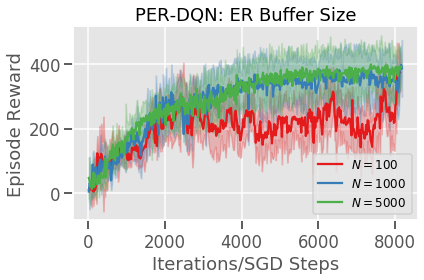

In [36]:
# Importance Sampling Plot
rew_1 = plt.plot(per_dqn_capacity_100.loc[:, "opt_counter"], per_dqn_capacity_100.loc[:, "rew_mean"], label=r"$N = 100$")
plt.fill_between(per_dqn_capacity_100.loc[:, "opt_counter"],
                 per_dqn_capacity_100.loc[:, "rew_mean"] - 2*per_dqn_capacity_100.loc[:, "rew_sd"],
                 per_dqn_capacity_100.loc[:, "rew_mean"] + 2*per_dqn_capacity_100.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(per_dqn_capacity_1000.loc[:, "opt_counter"], per_dqn_capacity_1000.loc[:, "rew_mean"], label=r"$N = 1000$")
plt.fill_between(per_dqn_capacity_1000.loc[:, "opt_counter"],
                 per_dqn_capacity_1000.loc[:, "rew_mean"] - 2*per_dqn_capacity_1000.loc[:, "rew_sd"],
                 per_dqn_capacity_1000.loc[:, "rew_mean"] + 2*per_dqn_capacity_1000.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(per_dqn_capacity_5000.loc[:, "opt_counter"], per_dqn_capacity_5000.loc[:, "rew_mean"], label=r"$N = 5000$")
plt.fill_between(per_dqn_capacity_5000.loc[:, "opt_counter"],
                 per_dqn_capacity_5000.loc[:, "rew_mean"] - 2*per_dqn_capacity_5000.loc[:, "rew_sd"],
                 per_dqn_capacity_5000.loc[:, "rew_mean"] + 2*per_dqn_capacity_5000.loc[:, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xlabel("Iterations/SGD Steps")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("PER-DQN: ER Buffer Size")
plt.tight_layout()
plt.savefig(fig_dir + "per_dqn_er.png", dpi=300)

# Plots Dueling DQN

In [38]:
# Load in Dueling DQN Logs
dueling_dqn_64 = pd.read_csv(log_dir + "dueling_dqn_64.csv")
dueling_dqn_128 = pd.read_csv(log_dir + "dueling_dqn_128.csv")
dueling_dqn_256 = pd.read_csv(log_dir + "dueling_dqn_256.csv")

dueling_dqn = pd.read_csv(log_dir + "dueling_dqn.csv")
double_dueling_dqn = pd.read_csv(log_dir + "double_dueling_dqn.csv")
per_double_dueling_dqn = pd.read_csv(log_dir + "per_double_dueling_dqn.csv")

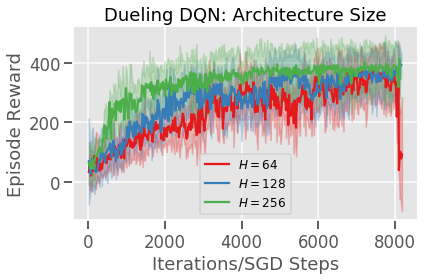

In [39]:
# Architecture Plot
rew_1 = plt.plot(dueling_dqn_64.loc[:, "opt_counter"], dueling_dqn_64.loc[:, "rew_mean"], label=r"$H = 64$")
plt.fill_between(dueling_dqn_64.loc[:, "opt_counter"],
                 dueling_dqn_64.loc[:, "rew_mean"] - 2*dueling_dqn_64.loc[:, "rew_sd"],
                 dueling_dqn_64.loc[:, "rew_mean"] + 2*dueling_dqn_64.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(dueling_dqn_128.loc[:, "opt_counter"], dueling_dqn_128.loc[:, "rew_mean"], label=r"$H = 128$")
plt.fill_between(dueling_dqn_128.loc[:, "opt_counter"],
                 dueling_dqn_128.loc[:, "rew_mean"] - 2*dueling_dqn_128.loc[:, "rew_sd"],
                 dueling_dqn_128.loc[:, "rew_mean"] + 2*dueling_dqn_128.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(dueling_dqn_256.loc[:, "opt_counter"], dueling_dqn_256.loc[:, "rew_mean"], label=r"$H = 256$")
plt.fill_between(dueling_dqn_256.loc[:, "opt_counter"],
                 dueling_dqn_256.loc[:, "rew_mean"] - 2*dueling_dqn_256.loc[:, "rew_sd"],
                 dueling_dqn_256.loc[:, "rew_mean"] + 2*dueling_dqn_256.loc[:, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xlabel("Iterations/SGD Steps")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("Dueling DQN: Architecture Size")
plt.tight_layout()
plt.savefig(fig_dir + "dueling_dqn_arch.png", dpi=300)

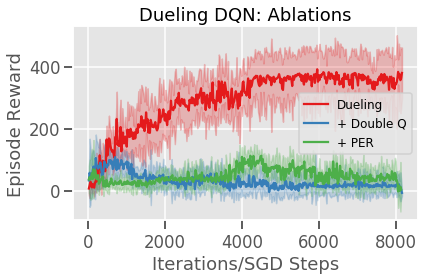

In [40]:
# Comparing all additions Plot
rew_1 = plt.plot(dueling_dqn.loc[:, "opt_counter"], dueling_dqn.loc[:, "rew_mean"], label=r"Dueling")
plt.fill_between(dueling_dqn.loc[:, "opt_counter"],
                 dueling_dqn.loc[:, "rew_mean"] - 2*dueling_dqn.loc[:, "rew_sd"],
                 dueling_dqn.loc[:, "rew_mean"] + 2*dueling_dqn.loc[:, "rew_sd"],
                 color=rew_1[0].get_color(), alpha=0.25)

rew_2 = plt.plot(double_dueling_dqn.loc[:, "opt_counter"], double_dueling_dqn.loc[:, "rew_mean"], label=r"+ Double Q")
plt.fill_between(double_dueling_dqn.loc[:, "opt_counter"],
                 double_dueling_dqn.loc[:, "rew_mean"] - 2*double_dueling_dqn.loc[:, "rew_sd"],
                 double_dueling_dqn.loc[:, "rew_mean"] + 2*double_dueling_dqn.loc[:, "rew_sd"],
                 color=rew_2[0].get_color(), alpha=0.25)

rew_3 = plt.plot(per_double_dueling_dqn.loc[:, "opt_counter"], per_double_dueling_dqn.loc[:, "rew_mean"], label=r"+ PER")
plt.fill_between(per_double_dueling_dqn.loc[:, "opt_counter"],
                 per_double_dueling_dqn.loc[:, "rew_mean"] - 2*per_double_dueling_dqn.loc[:, "rew_sd"],
                 per_double_dueling_dqn.loc[:, "rew_mean"] + 2*per_double_dueling_dqn.loc[:, "rew_sd"],
                 color=rew_3[0].get_color(), alpha=0.25)

plt.xlabel("Iterations/SGD Steps")
plt.ylabel("Episode Reward")
plt.legend(fontsize=12)
plt.title("Dueling DQN: Ablations")
plt.tight_layout()
plt.savefig(fig_dir + "dueling_dqn_all.png", dpi=300)